##### Link til opgave: https://docs.google.com/document/d/1jb6_LgLbVwkT_lf0lUngw--1tFNWPCJPBrzGh9jgFJg/edit?usp=sharing

#### Spørgsmål

1) Hvilket land i Norden (Danmark, Finland, Island, Norge og Sverige) har samlet set flest ‘Video Views’ beregnet ud fra hvert lands top 250? Lav et pie chart, som viser fordelingen.

2) Hvilken ‘Channel Type’ har samlet set flest uploads ud fra top 250 for hver ‘Channel Type’? Vis fordelingen af uploads pr. ‘Channel Type’ med et bar plot.

3) Hvordan er fordelingen af ‘Channel Type’ på danmarks top 250 youtube kanaler fordelt på most subscribers? Vis dette med et bar plot.

##### URL: https://socialblade.com/youtube/top/



In [1]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import ProcessPoolExecutor
import multiprocessing
import matplotlib.pyplot as plt
import numpy as np

# running headless
options = Options()
options.headless = True

##### 1) Hvilket land i Norden (Danmark, Finland, Island, Norge og Sverige) har samlet set flest ‘Video Views’ beregnet ud fra hvert lands top 250? Lav et pie chart, som viser fordelingen.

In [2]:
contries = ['dk', 'fi', 'is', 'no', 'se']

def total_views_top_250_by_country(country_code):
    views = 0
    url = 'https://socialblade.com/youtube/top/country/{}'.format(country_code)
    browser = webdriver.Firefox(options=options)
    browser.get(url)
    browser.implicitly_wait(3)
    
    for i in tqdm(range(5, 255)):
        div = browser.find_element_by_xpath('/html/body/div[11]/div[2]/div[{}]'.format(i))
        data_list = div.find_elements_by_tag_name('div')
        views += int(data_list[5].text.replace(',', ''))
    
    browser.quit()
    
    return country_code, views

def total_views_list(func, args, workers=multiprocessing.cpu_count()):
    with ProcessPoolExecutor(workers) as ex:
        res = ex.map(func, args)
        return list(res)
    
    #with ThreadPoolExecutor(len(args)) as ex:
        #res = tqdm(ex.map(total_views_top_250_by_country, contries), total=len(contries))
        #return list(res)

total_views_list = total_views_list(total_views_top_250_by_country, contries)
print(total_views_list)

100%|██████████| 250/250 [00:10<00:00, 24.91it/s]


[('dk', 16995338111), ('fi', 26551243594), ('is', 3754414133), ('no', 39564969894), ('se', 51154234381)]


<IPython.core.display.Javascript object>


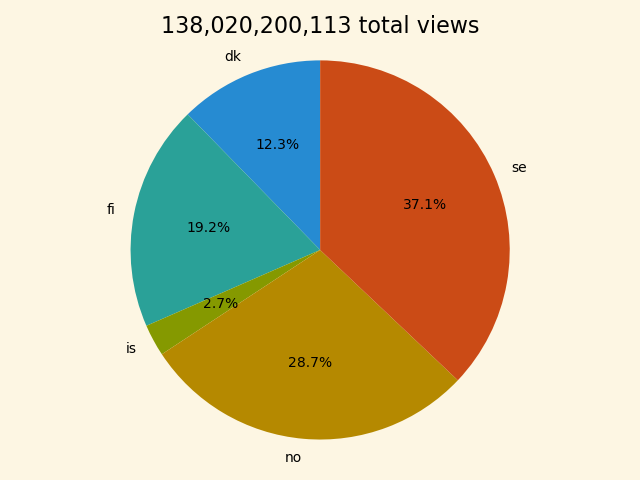

Text(0.5, 1.0, '138,020,200,113 total views')

In [8]:
%matplotlib notebook

# data
data = total_views_list
labels, views = zip(*data)
total_views = sum(views)
#explode = (0, 0, 0, 0, 0.1)  # only "explode" the 5th slice (i.e. 'se')

#plot
fig, ax = plt.subplots()
ax.pie(views, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('{} total views'.format(f'{total_views:,}'))

##### 2) Hvilken ‘Channel Type’ har samlet set flest uploads ud fra top 250 for hver ‘Channel Type’? Vis fordelingen af uploads pr. ‘Channel Type’ med et bar plot.

In [9]:
def channel_types_list():
    channel_types = []
    url = 'https://socialblade.com/youtube/top/'
    browser = webdriver.Firefox(options=options)
    browser.get(url)
    browser.implicitly_wait(3)
    
    div = browser.find_element_by_xpath('/html/body/div[11]/div[1]/div[8]')
    links = div.find_elements_by_tag_name('a')
    for link in tqdm(links):
        name = link.text
        href = link.get_attribute('href')
        channel_types.append((name, href))
        
    browser.quit()
    
    return channel_types


def total_uploads_by_channel_type(url, channel_type_name):
    uploads = 0
    browser = webdriver.Firefox(options=options)
    browser.get(url)
    browser.implicitly_wait(3)
    
    for i in tqdm(range(5, 255)):
        try:
            div = browser.find_element_by_xpath('/html/body/div[11]/div[2]/div[{}]'.format(i))
            row = div.find_elements_by_tag_name('div')
            channel_name_raw = row[2].text
            value_raw = row[3].text
            
            if value_raw == '--' and channel_name_raw == '':
                raise Exception('No data for #{} at {}'.format(i, url))
            
            if value_raw == '--':
                raise Exception('No uploads for #{} at {}'.format(i, url))
            
            uploads += int(value_raw.replace(',', ''))
            
        except Exception as e:
            print(e)
            
    
    browser.quit()
    
    return channel_type_name, uploads

# list of channel types from website
channel_types_list = channel_types_list()
channel_names, channel_urls = zip(*channel_types_list)
    
def total_uploads_list(func, channel_urls, channel_names, workers=multiprocessing.cpu_count()):
    with ProcessPoolExecutor(workers) as ex:
        res = ex.map(func, channel_urls, channel_names)
        return list(res)

total_uploads_list = total_uploads_list(total_uploads_by_channel_type, channel_urls, channel_names)
print(total_uploads_list)

 35%|███▌      | 88/250 [00:03<00:08, 19.21it/s]]

No uploads for #113 at https://socialblade.com/youtube/top/category/shows


 43%|████▎     | 107/250 [00:05<00:11, 13.00it/s]

No data for #136 at https://socialblade.com/youtube/top/category/shows


 25%|██▍       | 62/250 [00:03<00:10, 18.39it/s]]

No data for #137 at https://socialblade.com/youtube/top/category/shows


 26%|██▌       | 64/250 [00:03<00:10, 18.03it/s]

No data for #138 at https://socialblade.com/youtube/top/category/shows


 44%|████▎     | 109/250 [00:05<00:13, 10.46it/s]

No data for #139 at https://socialblade.com/youtube/top/category/shows


 44%|████▍     | 111/250 [00:05<00:09, 14.62it/s]

No data for #140 at https://socialblade.com/youtube/top/category/shows


 44%|████▍     | 111/250 [00:05<00:12, 11.30it/s]

No data for #141 at https://socialblade.com/youtube/top/category/shows


 45%|████▌     | 113/250 [00:05<00:08, 15.27it/s]

No data for #142 at https://socialblade.com/youtube/top/category/shows


 45%|████▌     | 113/250 [00:05<00:10, 12.56it/s]

No data for #143 at https://socialblade.com/youtube/top/category/shows


 46%|████▌     | 115/250 [00:05<00:10, 13.31it/s]

No data for #144 at https://socialblade.com/youtube/top/category/shows


 56%|█████▌    | 140/250 [00:07<00:07, 14.12it/s]

No data for #145 at https://socialblade.com/youtube/top/category/shows


 47%|████▋     | 117/250 [00:05<00:09, 14.59it/s]

No data for #146 at https://socialblade.com/youtube/top/category/shows


 48%|████▊     | 119/250 [00:05<00:07, 17.06it/s]

No data for #147 at https://socialblade.com/youtube/top/category/shows


 48%|████▊     | 119/250 [00:06<00:08, 15.83it/s]

No data for #148 at https://socialblade.com/youtube/top/category/shows


 48%|████▊     | 121/250 [00:06<00:08, 15.38it/s]

No data for #149 at https://socialblade.com/youtube/top/category/shows


 49%|████▉     | 123/250 [00:06<00:08, 15.51it/s]

No data for #150 at https://socialblade.com/youtube/top/category/shows


 32%|███▏      | 81/250 [00:04<00:09, 18.51it/s]]

No data for #151 at https://socialblade.com/youtube/top/category/shows


 50%|█████     | 125/250 [00:06<00:07, 15.69it/s]

No data for #152 at https://socialblade.com/youtube/top/category/shows


 51%|█████     | 127/250 [00:06<00:07, 16.84it/s]

No data for #153 at https://socialblade.com/youtube/top/category/shows


 51%|█████     | 127/250 [00:06<00:07, 16.52it/s]

No data for #154 at https://socialblade.com/youtube/top/category/shows


 52%|█████▏    | 129/250 [00:06<00:07, 17.16it/s]

No data for #155 at https://socialblade.com/youtube/top/category/shows


 35%|███▍      | 87/250 [00:04<00:08, 20.18it/s]]

No data for #156 at https://socialblade.com/youtube/top/category/shows


 52%|█████▏    | 131/250 [00:06<00:06, 17.46it/s]

No data for #157 at https://socialblade.com/youtube/top/category/shows

 52%|█████▏    | 131/250 [00:06<00:06, 17.49it/s]

 36%|███▌      | 90/250 [00:04<00:07, 20.76it/s]

No data for #158 at https://socialblade.com/youtube/top/category/shows


 53%|█████▎    | 133/250 [00:06<00:06, 17.35it/s]

No data for #159 at https://socialblade.com/youtube/top/category/shows
No data for #160 at https://socialblade.com/youtube/top/category/shows


 54%|█████▍    | 135/250 [00:07<00:06, 16.66it/s]

No data for #161 at https://socialblade.com/youtube/top/category/shows


 55%|█████▍    | 137/250 [00:06<00:06, 16.77it/s]

No data for #162 at https://socialblade.com/youtube/top/category/shows


 55%|█████▍    | 137/250 [00:07<00:06, 16.21it/s]

No data for #163 at https://socialblade.com/youtube/top/category/shows


 56%|█████▌    | 139/250 [00:07<00:06, 16.44it/s]

No data for #164 at https://socialblade.com/youtube/top/category/shows


 56%|█████▌    | 139/250 [00:07<00:06, 16.06it/s]

No data for #165 at https://socialblade.com/youtube/top/category/shows


 56%|█████▋    | 141/250 [00:07<00:06, 16.45it/s]

No data for #166 at https://socialblade.com/youtube/top/category/shows


 40%|████      | 101/250 [00:05<00:07, 18.68it/s]

No data for #167 at https://socialblade.com/youtube/top/category/shows


 57%|█████▋    | 143/250 [00:07<00:06, 16.51it/s]

No data for #168 at https://socialblade.com/youtube/top/category/shows


 41%|████      | 103/250 [00:05<00:07, 18.92it/s]

No data for #169 at https://socialblade.com/youtube/top/category/shows


 42%|████▏     | 105/250 [00:05<00:08, 17.76it/s]

No data for #170 at https://socialblade.com/youtube/top/category/shows


 58%|█████▊    | 145/250 [00:07<00:06, 15.52it/s]

No data for #171 at https://socialblade.com/youtube/top/category/shows


 43%|████▎     | 107/250 [00:05<00:08, 17.83it/s]

No data for #172 at https://socialblade.com/youtube/top/category/shows

 59%|█████▉    | 147/250 [00:07<00:06, 15.53it/s]

 59%|█████▉    | 147/250 [00:07<00:07, 13.01it/s]

No data for #173 at https://socialblade.com/youtube/top/category/shows


 60%|█████▉    | 149/250 [00:07<00:06, 16.00it/s]

No data for #174 at https://socialblade.com/youtube/top/category/shows


 44%|████▍     | 111/250 [00:05<00:07, 18.36it/s]

No data for #175 at https://socialblade.com/youtube/top/category/shows


 60%|██████    | 151/250 [00:08<00:06, 16.32it/s]

No data for #176 at https://socialblade.com/youtube/top/category/shows


 60%|██████    | 151/250 [00:07<00:06, 14.80it/s]

No data for #177 at https://socialblade.com/youtube/top/category/shows


 61%|██████    | 153/250 [00:08<00:05, 16.71it/s]

No data for #178 at https://socialblade.com/youtube/top/category/shows


 61%|██████    | 153/250 [00:08<00:06, 15.21it/s]

No data for #179 at https://socialblade.com/youtube/top/category/shows


 62%|██████▏   | 155/250 [00:08<00:06, 14.91it/s]

No data for #180 at https://socialblade.com/youtube/top/category/shows


 62%|██████▏   | 155/250 [00:08<00:06, 14.83it/s]

No data for #181 at https://socialblade.com/youtube/top/category/shows


 63%|██████▎   | 157/250 [00:08<00:06, 15.17it/s]

No data for #182 at https://socialblade.com/youtube/top/category/shows


 63%|██████▎   | 157/250 [00:08<00:07, 13.23it/s]

No data for #183 at https://socialblade.com/youtube/top/category/shows


 64%|██████▎   | 159/250 [00:08<00:05, 15.82it/s]

No data for #184 at https://socialblade.com/youtube/top/category/shows


 49%|████▉     | 123/250 [00:06<00:07, 17.51it/s]

No data for #185 at https://socialblade.com/youtube/top/category/shows


 64%|██████▍   | 161/250 [00:08<00:05, 15.70it/s]

No data for #186 at https://socialblade.com/youtube/top/category/shows


 50%|█████     | 125/250 [00:06<00:07, 17.86it/s]

No data for #187 at https://socialblade.com/youtube/top/category/shows


 65%|██████▌   | 163/250 [00:08<00:05, 15.95it/s]

No data for #188 at https://socialblade.com/youtube/top/category/shows


 51%|█████     | 127/250 [00:06<00:07, 17.21it/s]

No data for #189 at https://socialblade.com/youtube/top/category/shows


 66%|██████▌   | 165/250 [00:08<00:05, 15.61it/s]

No data for #190 at https://socialblade.com/youtube/top/category/shows


 66%|██████▌   | 165/250 [00:09<00:05, 14.23it/s]

No data for #191 at https://socialblade.com/youtube/top/category/shows


 67%|██████▋   | 167/250 [00:08<00:05, 15.64it/s]

No data for #192 at https://socialblade.com/youtube/top/category/shows


 68%|██████▊   | 169/250 [00:09<00:04, 16.36it/s]

No data for #193 at https://socialblade.com/youtube/top/category/shows
No data for #194 at https://socialblade.com/youtube/top/category/shows


 54%|█████▎    | 134/250 [00:07<00:06, 17.23it/s]

No data for #195 at https://socialblade.com/youtube/top/category/shows
No data for #196 at https://socialblade.com/youtube/top/category/shows


 69%|██████▉   | 173/250 [00:09<00:04, 16.99it/s]

No data for #197 at https://socialblade.com/youtube/top/category/shows
No data for #198 at https://socialblade.com/youtube/top/category/shows


 70%|███████   | 175/250 [00:09<00:04, 15.79it/s]

No data for #199 at https://socialblade.com/youtube/top/category/shows


 56%|█████▌    | 140/250 [00:07<00:06, 16.74it/s]

No data for #200 at https://socialblade.com/youtube/top/category/shows


 71%|███████   | 177/250 [00:09<00:05, 14.55it/s]

No data for #201 at https://socialblade.com/youtube/top/category/shows


 71%|███████   | 177/250 [00:09<00:05, 14.43it/s]

No data for #202 at https://socialblade.com/youtube/top/category/shows


 72%|███████▏  | 179/250 [00:09<00:04, 14.27it/s]

No data for #203 at https://socialblade.com/youtube/top/category/shows


 72%|███████▏  | 179/250 [00:09<00:05, 14.07it/s]

No data for #204 at https://socialblade.com/youtube/top/category/shows


 72%|███████▏  | 181/250 [00:09<00:04, 13.99it/s]

No data for #205 at https://socialblade.com/youtube/top/category/shows

 58%|█████▊    | 146/250 [00:07<00:06, 15.17it/s]

 73%|███████▎  | 183/250 [00:10<00:04, 14.56it/s]

No data for #206 at https://socialblade.com/youtube/top/category/shows


 59%|█████▉    | 148/250 [00:07<00:06, 15.86it/s]

No data for #207 at https://socialblade.com/youtube/top/category/shows


  0%|          | 1/250 [00:00<01:03,  3.90it/s]s]

No data for #208 at https://socialblade.com/youtube/top/category/shows


 74%|███████▍  | 185/250 [00:10<00:04, 15.05it/s]

No data for #209 at https://socialblade.com/youtube/top/category/shows


 61%|██████    | 152/250 [00:08<00:06, 16.24it/s]

No data for #210 at https://socialblade.com/youtube/top/category/shows


 62%|██████▏   | 154/250 [00:08<00:05, 16.53it/s]

No data for #211 at https://socialblade.com/youtube/top/category/shows
No data for #212 at https://socialblade.com/youtube/top/category/shows


 62%|██████▏   | 156/250 [00:08<00:05, 16.61it/s]

No data for #213 at https://socialblade.com/youtube/top/category/shows


 76%|███████▋  | 191/250 [00:10<00:04, 14.31it/s]

No data for #214 at https://socialblade.com/youtube/top/category/shows


  4%|▍         | 11/250 [00:00<00:26,  9.18it/s]]

No data for #215 at https://socialblade.com/youtube/top/category/shows


 64%|██████▍   | 160/250 [00:08<00:05, 15.35it/s]

No data for #216 at https://socialblade.com/youtube/top/category/shows


 78%|███████▊  | 195/250 [00:10<00:03, 13.83it/s]

No data for #217 at https://socialblade.com/youtube/top/category/shows


 79%|███████▉  | 197/250 [00:11<00:03, 14.21it/s]

No data for #218 at https://socialblade.com/youtube/top/category/shows


 86%|████████▌ | 214/250 [00:13<00:02, 12.52it/s]

No data for #219 at https://socialblade.com/youtube/top/category/shows


 80%|███████▉  | 199/250 [00:11<00:03, 14.40it/s]

No data for #220 at https://socialblade.com/youtube/top/category/shows


  9%|▉         | 23/250 [00:01<00:13, 17.37it/s]]

No data for #221 at https://socialblade.com/youtube/top/category/shows


 80%|████████  | 201/250 [00:11<00:03, 14.26it/s]

No data for #222 at https://socialblade.com/youtube/top/category/shows


 10%|█         | 26/250 [00:01<00:12, 17.63it/s]]

No data for #223 at https://socialblade.com/youtube/top/category/shows


 81%|████████  | 203/250 [00:11<00:03, 14.45it/s]

No data for #224 at https://socialblade.com/youtube/top/category/shows


 12%|█▏        | 29/250 [00:01<00:11, 19.81it/s]]

No data for #225 at https://socialblade.com/youtube/top/category/shows


 69%|██████▉   | 172/250 [00:09<00:04, 15.71it/s]

No data for #226 at https://socialblade.com/youtube/top/category/shows


 83%|████████▎ | 207/250 [00:11<00:02, 14.59it/s]

No data for #227 at https://socialblade.com/youtube/top/category/shows

 13%|█▎        | 32/250 [00:01<00:11, 18.42it/s]

 70%|██████▉   | 174/250 [00:09<00:04, 16.28it/s]

No data for #228 at https://socialblade.com/youtube/top/category/shows


 83%|████████▎ | 207/250 [00:11<00:02, 14.42it/s]

No data for #229 at https://socialblade.com/youtube/top/category/shows


 70%|███████   | 176/250 [00:09<00:04, 16.47it/s]

No data for #230 at https://socialblade.com/youtube/top/category/shows


 84%|████████▎ | 209/250 [00:12<00:02, 13.76it/s]

No data for #231 at https://socialblade.com/youtube/top/category/shows


 16%|█▋        | 41/250 [00:02<00:09, 21.61it/s]]

No data for #232 at https://socialblade.com/youtube/top/category/shows


 84%|████████▍ | 211/250 [00:12<00:02, 13.30it/s]

No data for #233 at https://socialblade.com/youtube/top/category/shows


 18%|█▊        | 44/250 [00:02<00:09, 22.54it/s]]

No data for #234 at https://socialblade.com/youtube/top/category/shows


 19%|█▉        | 47/250 [00:02<00:08, 23.35it/s]]

No data for #235 at https://socialblade.com/youtube/top/category/shows


 74%|███████▎  | 184/250 [00:10<00:04, 16.02it/s]

No data for #236 at https://socialblade.com/youtube/top/category/shows


 87%|████████▋ | 217/250 [00:12<00:02, 14.21it/s]

No data for #237 at https://socialblade.com/youtube/top/category/shows


 74%|███████▍  | 186/250 [00:10<00:03, 16.64it/s]

No data for #238 at https://socialblade.com/youtube/top/category/shows


 88%|████████▊ | 219/250 [00:12<00:02, 14.56it/s]

No data for #239 at https://socialblade.com/youtube/top/category/shows


 22%|██▏       | 56/250 [00:02<00:07, 24.42it/s]]

No data for #240 at https://socialblade.com/youtube/top/category/shows


 76%|███████▌  | 190/250 [00:10<00:03, 16.16it/s]

No data for #241 at https://socialblade.com/youtube/top/category/shows


 24%|██▎       | 59/250 [00:02<00:07, 23.97it/s]

No data for #242 at https://socialblade.com/youtube/top/category/shows


 77%|███████▋  | 192/250 [00:10<00:03, 15.82it/s]

No data for #243 at https://socialblade.com/youtube/top/category/shows


 88%|████████▊ | 221/250 [00:13<00:02, 11.72it/s]

No data for #244 at https://socialblade.com/youtube/top/category/shows


 26%|██▌       | 65/250 [00:03<00:08, 22.92it/s]]

No data for #245 at https://socialblade.com/youtube/top/category/shows


 78%|███████▊  | 196/250 [00:10<00:03, 15.41it/s]

No data for #246 at https://socialblade.com/youtube/top/category/shows


 27%|██▋       | 68/250 [00:03<00:07, 23.09it/s]]

No data for #247 at https://socialblade.com/youtube/top/category/shows


 79%|███████▉  | 198/250 [00:11<00:03, 15.09it/s]

No data for #248 at https://socialblade.com/youtube/top/category/shows


 28%|██▊       | 71/250 [00:03<00:07, 22.89it/s]]

No data for #249 at https://socialblade.com/youtube/top/category/shows


 92%|█████████▏| 231/250 [00:13<00:01, 13.90it/s]

No data for #250 at https://socialblade.com/youtube/top/category/shows


 81%|████████  | 202/250 [00:11<00:03, 15.10it/s]

No data for #251 at https://socialblade.com/youtube/top/category/shows


 93%|█████████▎| 233/250 [00:13<00:01, 13.44it/s]

No data for #252 at https://socialblade.com/youtube/top/category/shows


 31%|███       | 77/250 [00:03<00:09, 19.17it/s]]

No data for #253 at https://socialblade.com/youtube/top/category/shows


 82%|████████▏ | 206/250 [00:11<00:03, 14.60it/s]

No data for #254 at https://socialblade.com/youtube/top/category/shows


100%|██████████| 250/250 [00:11<00:00, 21.23it/s]


[('AUTO & VEHICLES', 288102), ('COMEDY', 299431), ('EDUCATION', 333731), ('ENTERTAINMENT', 3280410), ('FILM', 422492), ('GAMING', 592259), ('HOW TO & STYLE', 344250), ('MADE FOR KIDS', 213214), ('MUSIC', 581375), ('NEWS & POLITICS', 13666493), ('NONPROFIT & ACTIVISM', 667182), ('PEOPLE & BLOGS', 478691), ('PETS & ANIMALS', 198235), ('SCIENCE & TECHNOLOGY', 295687), ('SHOWS', 25284), ('SPORTS', 1801745), ('TRAVEL', 383574)]


<IPython.core.display.Javascript object>


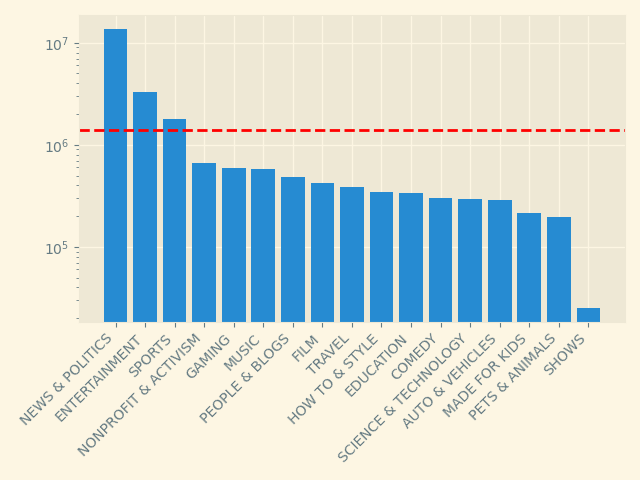

In [10]:
%matplotlib notebook

#data
data = total_uploads_list
data.sort(key=lambda tup: tup[1], reverse=True) # sorting data by avg_vowels
channels, uploads = zip(*data)
uploads_mean = np.mean(uploads)

# style
plt.style.use('Solarize_Light2')

# autolayout
plt.rcParams.update({'figure.autolayout': True})

# plot
fig, ax = plt.subplots()
ax.bar(channels, uploads, log=True)
#plt.bar(channels, uploads, width=0.5, align='center')
#plt.yscale('log')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
# median
ax.axhline(uploads_mean, ls='--', color='r')

##### 3) Hvordan er fordelingen af ‘Channel Type’ på danmarks top 250 youtube kanaler fordelt på most subscribers? Vis dette med et bar plot.

In [6]:
def channel_types_top_250_by_country(country_code):
    channel_types = {}
    url = 'https://socialblade.com/youtube/top/country/{}'.format(country_code)
    browser = webdriver.Firefox(options=options)
    browser.get(url)
    browser.implicitly_wait(3)
    
    for i in tqdm(range(5, 255)):
        div = browser.find_element_by_xpath('/html/body/div[11]/div[2]/div[{}]'.format(i))
        row = div.find_elements_by_tag_name('div')
        channel_type_raw = row[2].find_element_by_tag_name('i').get_attribute('title').split(':')
        channel_type = channel_type_raw[1].strip().capitalize()
        if channel_type == "":
            channel_type = "Unknown"
        
        if channel_type not in channel_types:
            channel_types[channel_type] = 1
        else:
            channel_types[channel_type] += 1
            
    return channel_types

channel_types_top_250 = channel_types_top_250_by_country('dk')

100%|██████████| 250/250 [00:08<00:00, 28.12it/s]


<IPython.core.display.Javascript object>


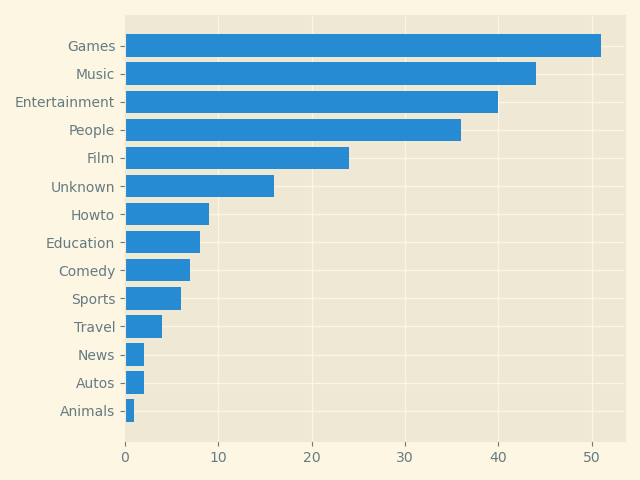

<BarContainer object of 14 artists>

In [7]:
%matplotlib notebook

# data
data_raw = channel_types_top_250
channels = sorted(data_raw, key=data_raw.get)
values = sorted(data_raw.values())

# style
plt.style.use('Solarize_Light2')

#plot
fig, ax = plt.subplots()
ax.barh(channels, values)